### Comparison of the stability of ODEs system

---

$$
\text{Stable case:}
\begin{cases}
x' = -x + xy\\
y’ = -2y + 2y^2
\end{cases} 
$$

In [1]:
import sys
sys.path.append("../DQbee/")
from Simulation import *
from DQbee import *
from qbee import *
import sympy as sp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

------------------- Import Dqbee -------------------
---------- Dqbee Module loaded successfully ----------


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/qbee/util.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
x, y = sp.symbols("x, y")

system_stable = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, -2 * y + 2 *y ** 2)
]

eq_system_stable = EquationSystem(system_stable)
initial_state={x: 0.1, y: 0.01}
simulation_stable = system_to_odeint(eq_system_stable, t=[0, 10, 1000], initial_state=initial_state)

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [3]:
system_origin = [sp.Eq(x, -x + x ** 3)]

eq_system_origin = EquationSystem(system_origin)
simulation_origin = system_to_odeint(eq_system_origin, t=[0, 10, 1000], initial_state=initial_state)
state_origin = simulation_origin[0]
variable_index_origin = simulation_origin[1]
t_origin = simulation_origin[2]
x_origin_index = variable_index_origin.index(x)

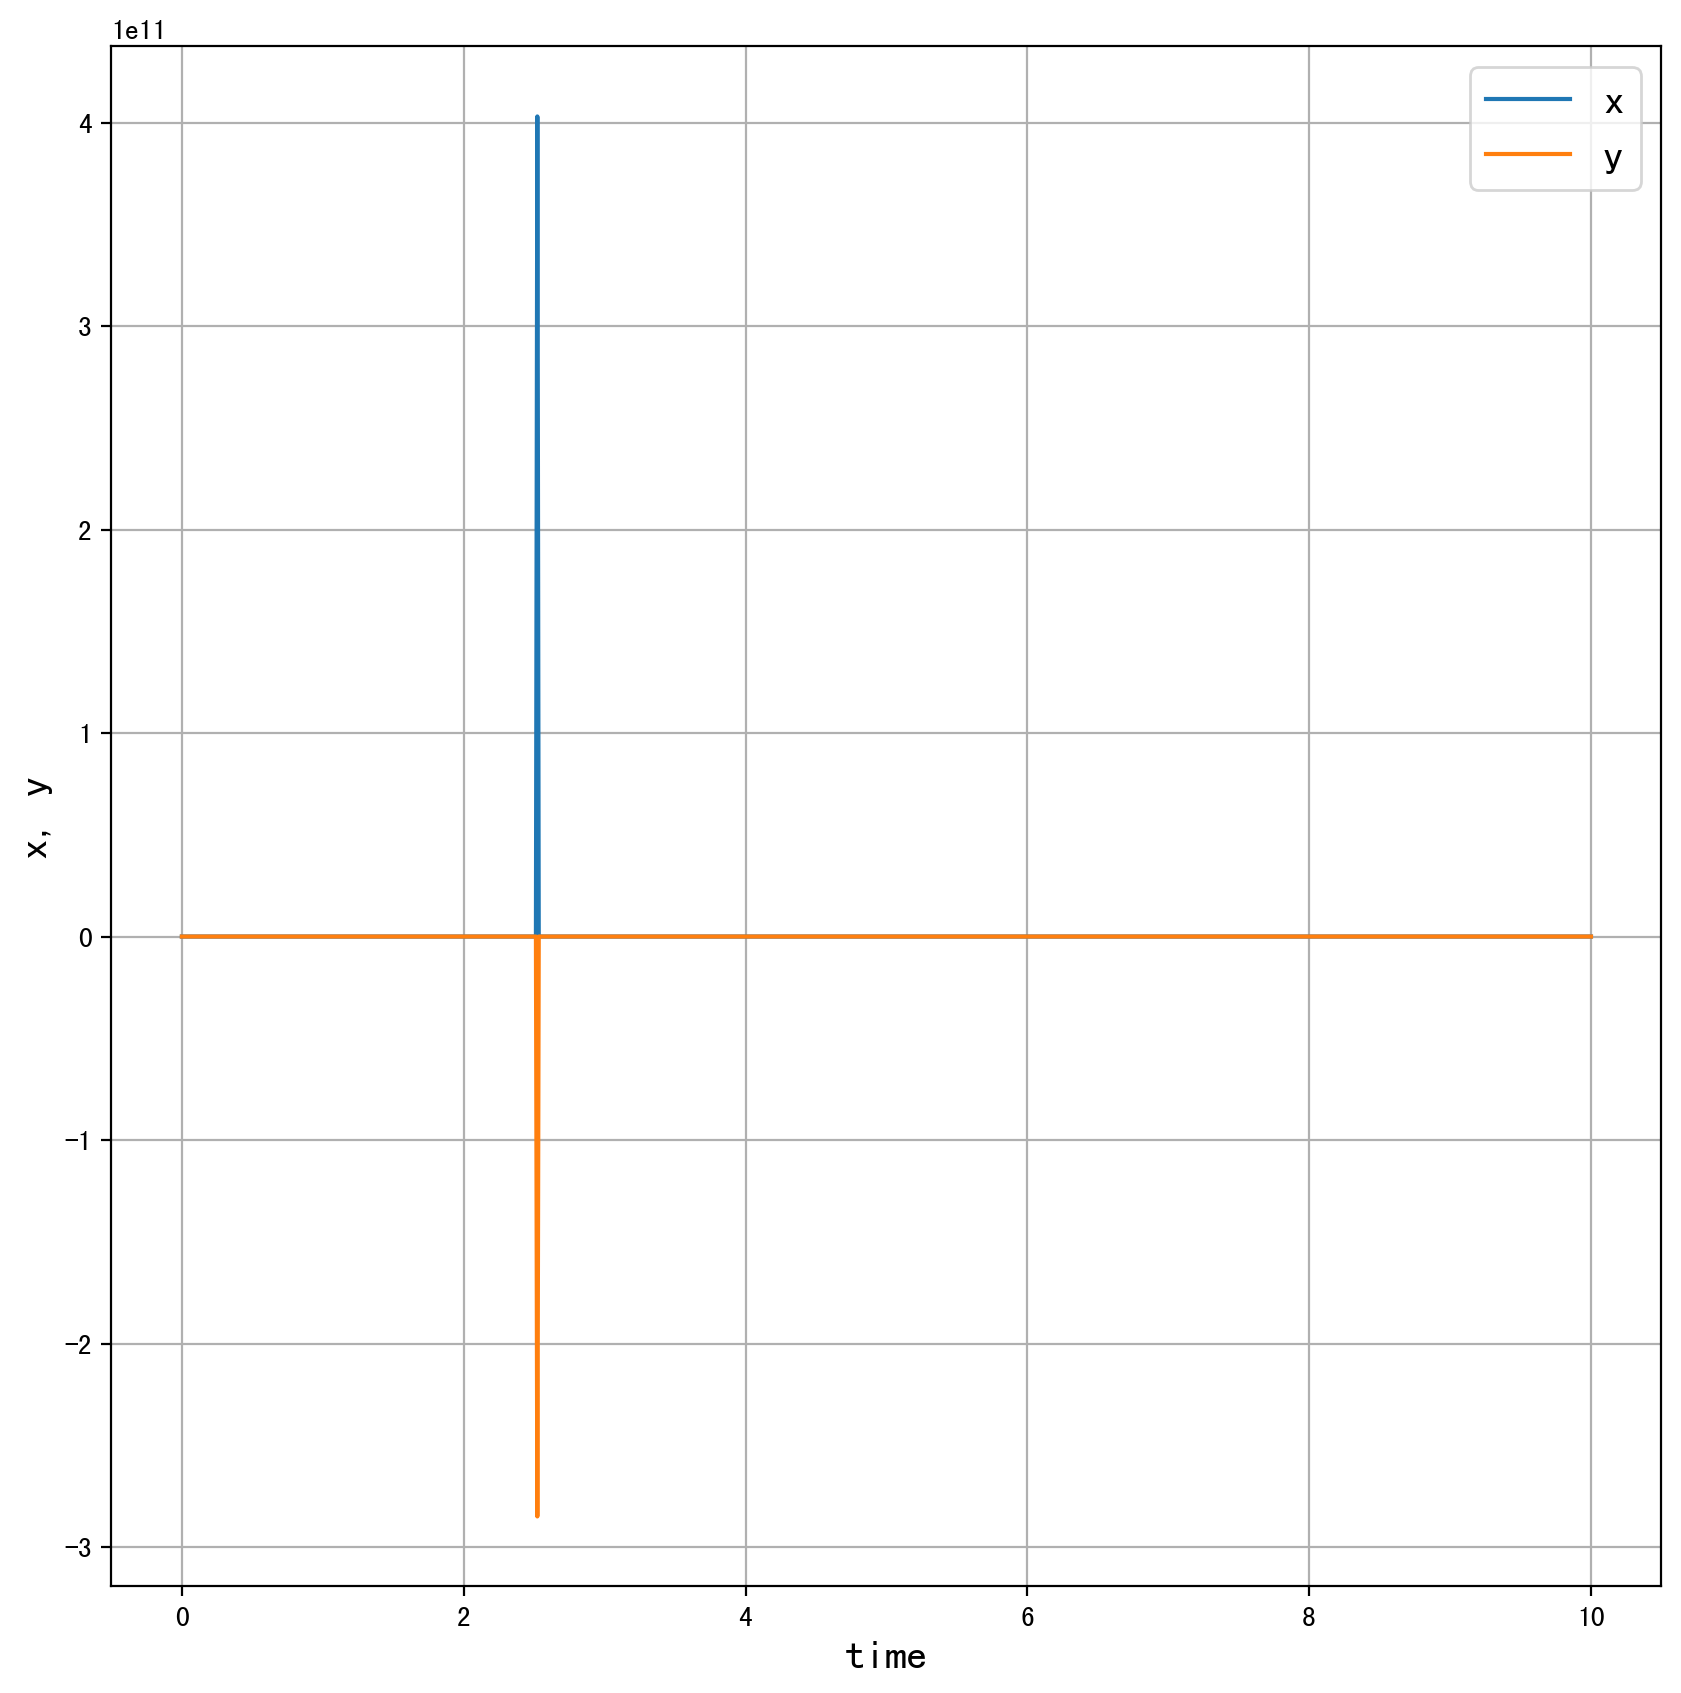

In [4]:
state_stable, variable_index_stable, t_stable = simulation_stable
x_stable_index = variable_index_stable.index(x)
y_stable_index = variable_index_stable.index(y)
plt.figure(figsize=(10, 10))
plt.plot(t_stable, state_stable[:, x_stable_index], label="x")
plt.plot(t_stable, state_stable[:, y_stable_index], label="y")
plt.xlabel("time", size=15)
plt.ylabel("x, y", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

$$
\text{Unstable case:}
\begin{cases}
x' = -x + xy\\
y' = y - 3x^2 + 2y^2
\end{cases} 
$$

In [5]:
system_unstable = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, 10 * y - 12 * x ** 2 + 2 *y ** 2)
]

eq_system_unstable = EquationSystem(system_unstable)
simulation_unstable = system_to_odeint(eq_system_unstable, t=[0, 10, 1000], initial_state=initial_state)

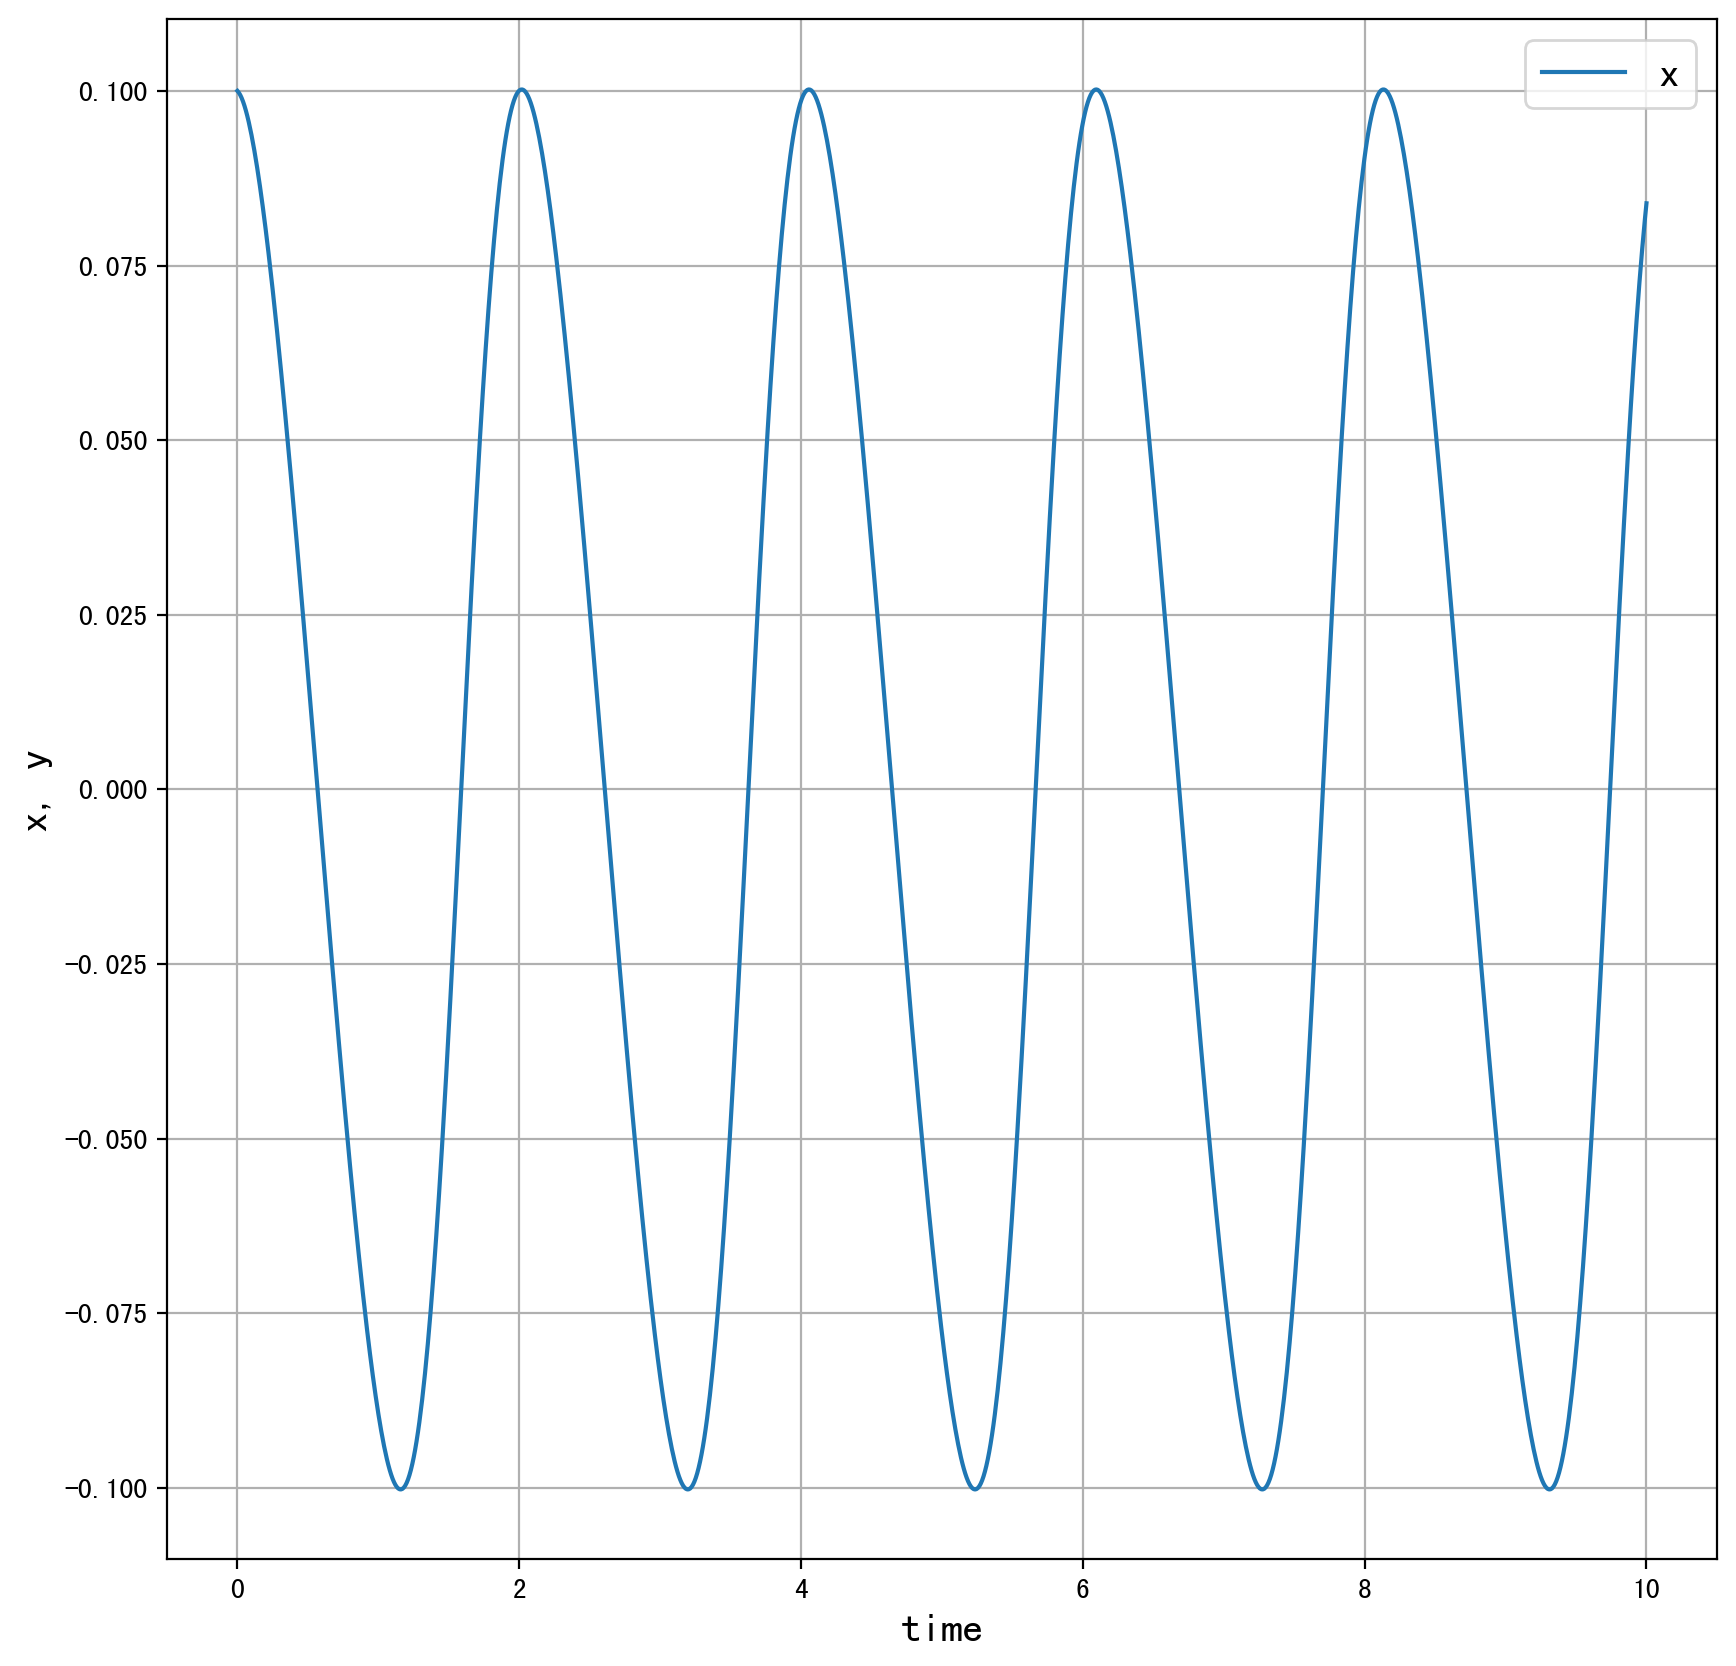

In [6]:
state_unstable, variable_index_unstable, t_unstable = simulation_unstable
x_unstable_index = variable_index_unstable.index(x)
y_unstable_index = variable_index_unstable.index(y)
plt.figure(figsize=(10, 10))
plt.plot(t_unstable, state_unstable[:, x_unstable_index], label="x")
# plt.plot(t_unstable, state_unstable[:, y_unstable_index], label="y")
plt.xlabel("time", size=15)
plt.ylabel("x, y", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

$$
\text{Uncertain case:}
\begin{cases}
x' = -x + xy\\
y’ = -2x^2 + 2y^2
\end{cases}
$$

In [7]:
system_uncertain = [
    sp.Eq(x, -x + x * y),
    sp.Eq(y, -2 * x ** 2 + 2 *y ** 2)
]

eq_system_uncertain = EquationSystem(system_uncertain)
simulation_uncertain = system_to_odeint(eq_system_uncertain, t=[0, 10, 1000], initial_state=initial_state)

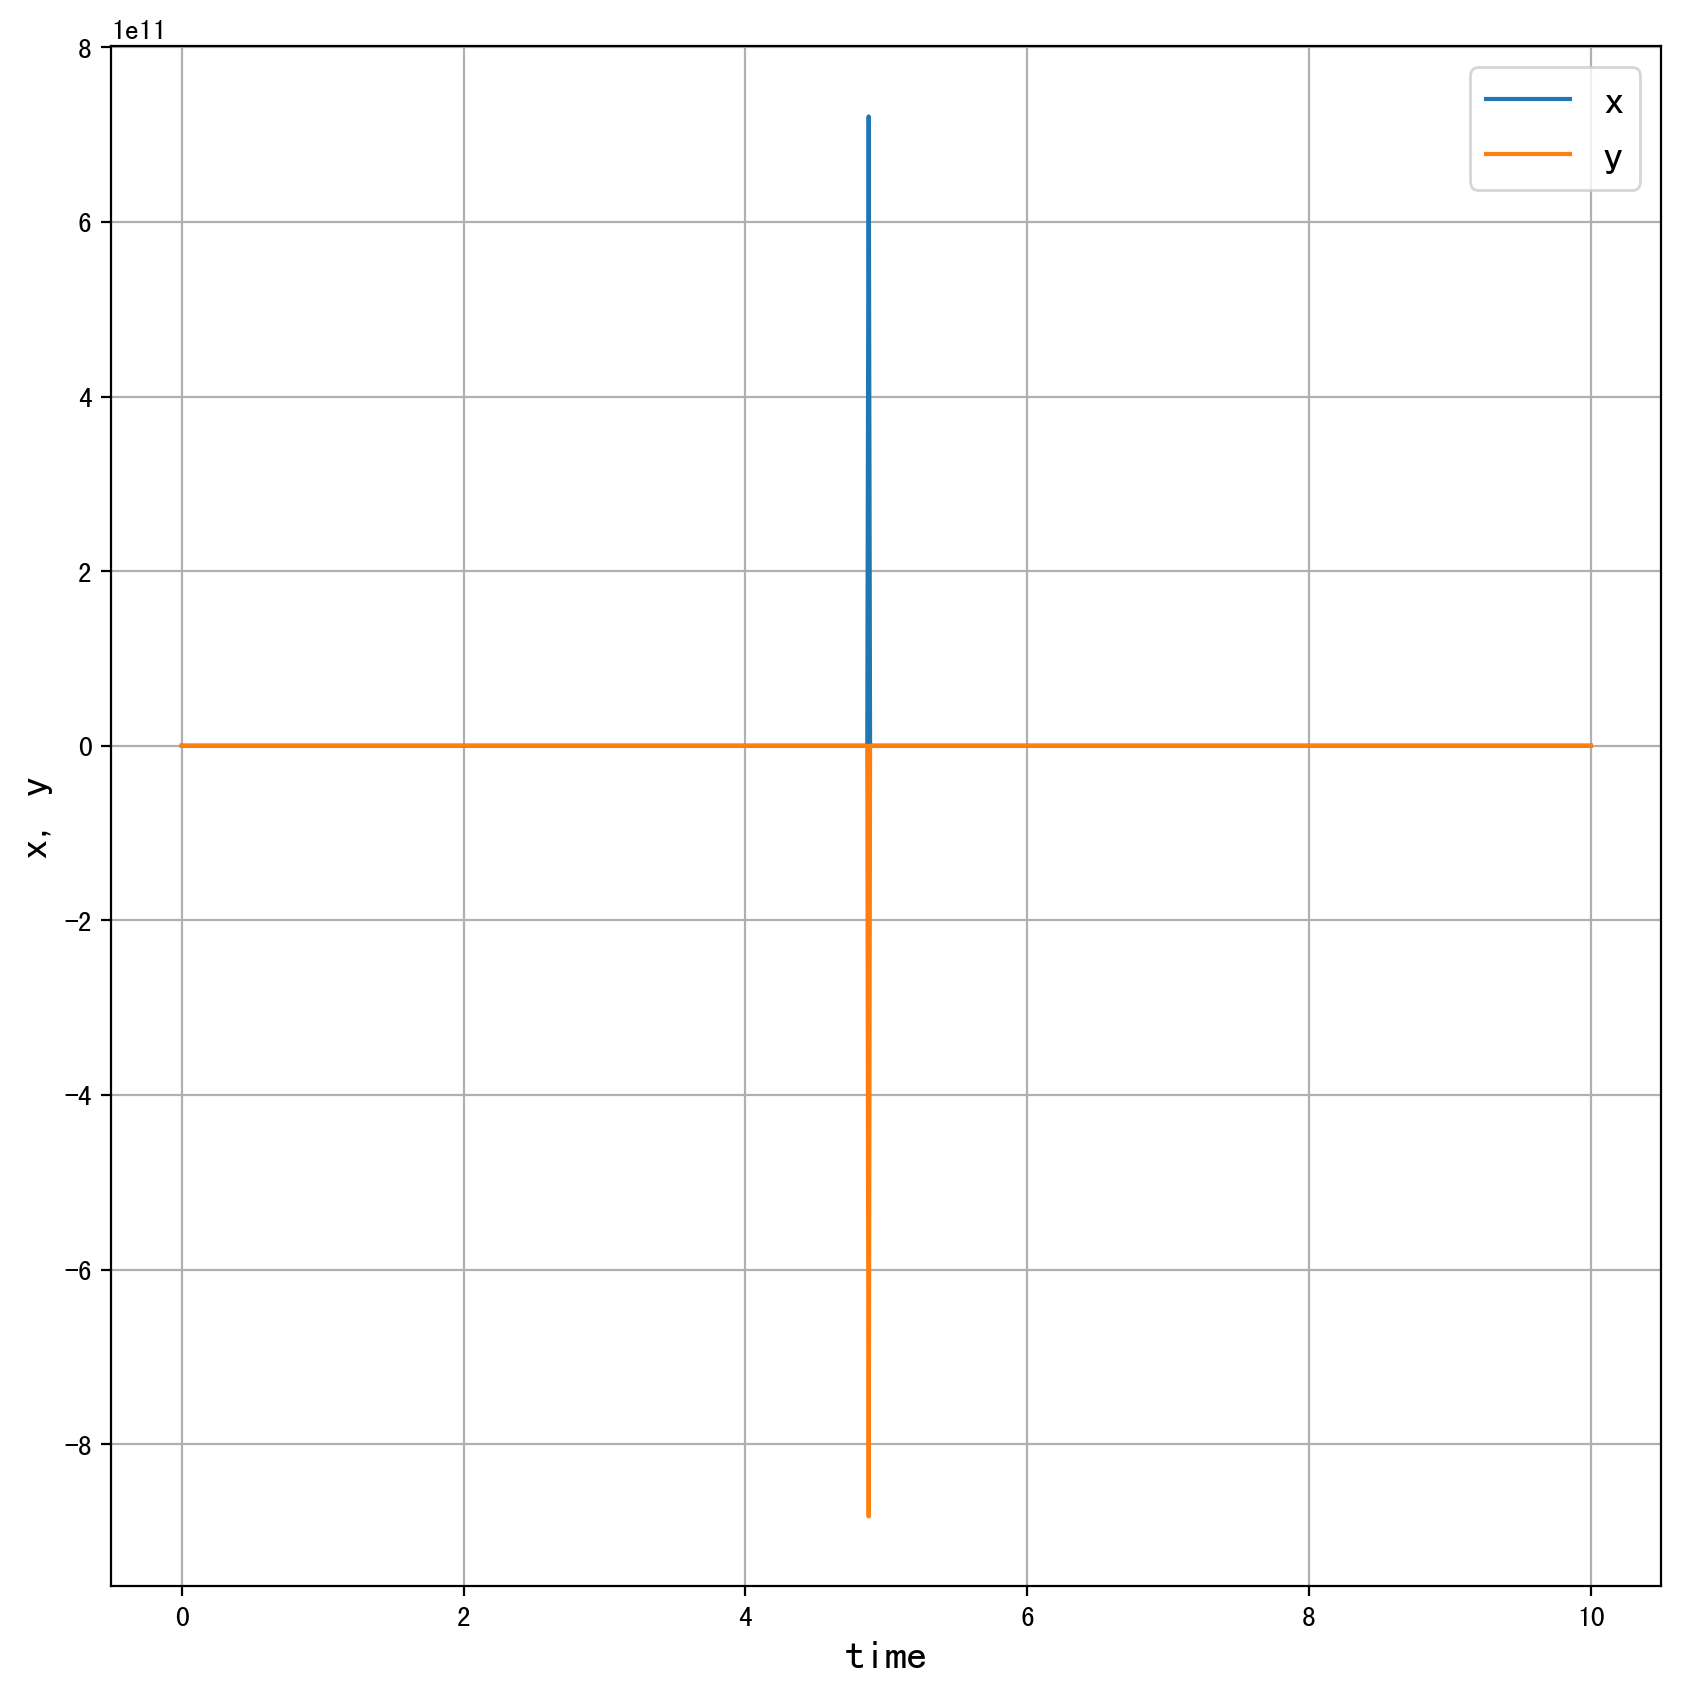

In [8]:
state_uncertain, variable_index_uncertain, t_uncertain = simulation_uncertain
x_uncertain_index = variable_index_uncertain.index(x)
y_uncertain_index = variable_index_uncertain.index(y)
plt.figure(figsize=(10, 10))
plt.plot(t_uncertain, state_uncertain[:, x_uncertain_index], label="x")
plt.plot(t_uncertain, state_uncertain[:, y_uncertain_index], label="y")
plt.xlabel("time", size=15)
plt.ylabel("x, y", size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

(-0.05, 0.35)

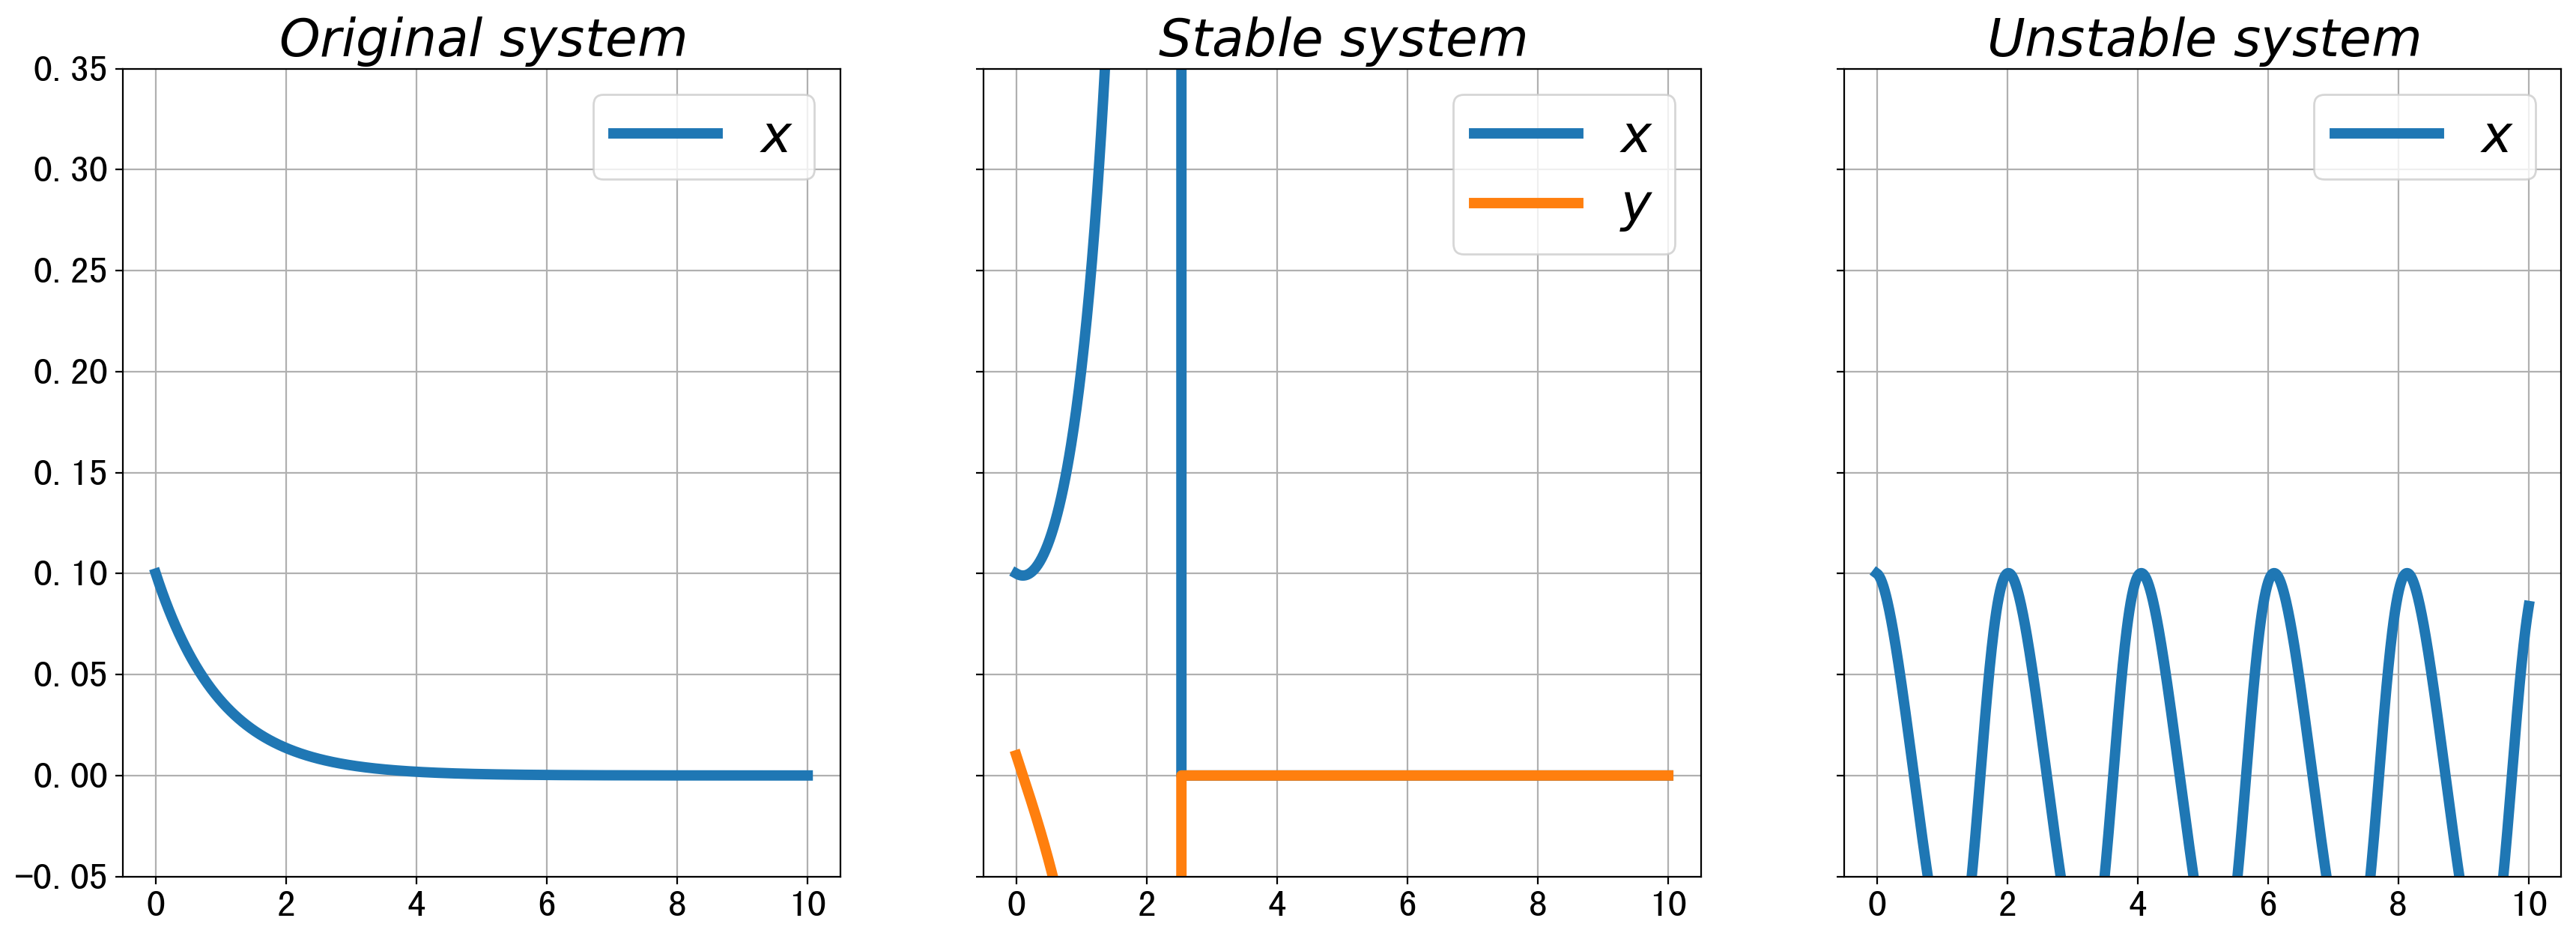

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(21, 7))

ax1.set_title(r"$Original\ system$", size=25)
ax1.plot(t_origin, state_origin[:, x_origin_index], label=r"$x$", linewidth=5)  # adjust linewidth and use LaTeX in label
ax1.legend(fontsize=25)
ax1.grid()

ax2.set_title(r"$Stable\ system$", size=25)
ax2.plot(t_stable, state_stable[:, x_stable_index], label=r"$x$", linewidth=5)
ax2.plot(t_stable, state_stable[:, y_stable_index], label=r"$y$", linewidth=5)
ax2.legend(fontsize=25)
ax2.grid()

ax3.set_title(r"$Unstable\ system$", size=25)
ax3.plot(t_unstable, state_unstable[:, x_unstable_index], label=r"$x$", linewidth=5)
ax3.legend(fontsize=25)
ax3.grid()

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.set_ylim(-0.05, 0.35)
# plt.savefig("../example2.png", dpi=1000, bbox_inches = 'tight')

### Runge-Kutta method for simulation

---

In [10]:
simulation_stable_RK = system_to_solve_ivp(eq_system_stable, t=[0, 10, 1000], initial_state=initial_state, method="RK45")
simulation_unstable_RK = system_to_solve_ivp(eq_system_unstable, t=[0, 10, 1000], initial_state=initial_state, method="RK45")
simulation_origin_RK = system_to_solve_ivp(eq_system_origin, t=[0, 10, 1000], initial_state=initial_state, method="RK45")

In [11]:
state_stable_RK, variable_index_stable_RK, t_stable_RK = simulation_stable_RK
state_unstable_RK, variable_index_unstable_RK, t_unstable_RK = simulation_unstable_RK
state_origin_RK, variable_index_origin_RK, t_origin_RK = simulation_origin_RK
x_stable_index_RK = variable_index_stable_RK.index(x)
y_stable_index_RK = variable_index_stable_RK.index(y)
x_unstable_index_RK = variable_index_unstable_RK.index(x)
y_unstable_index_RK = variable_index_unstable_RK.index(y)
x_origin_index_RK = variable_index_origin_RK.index(x)

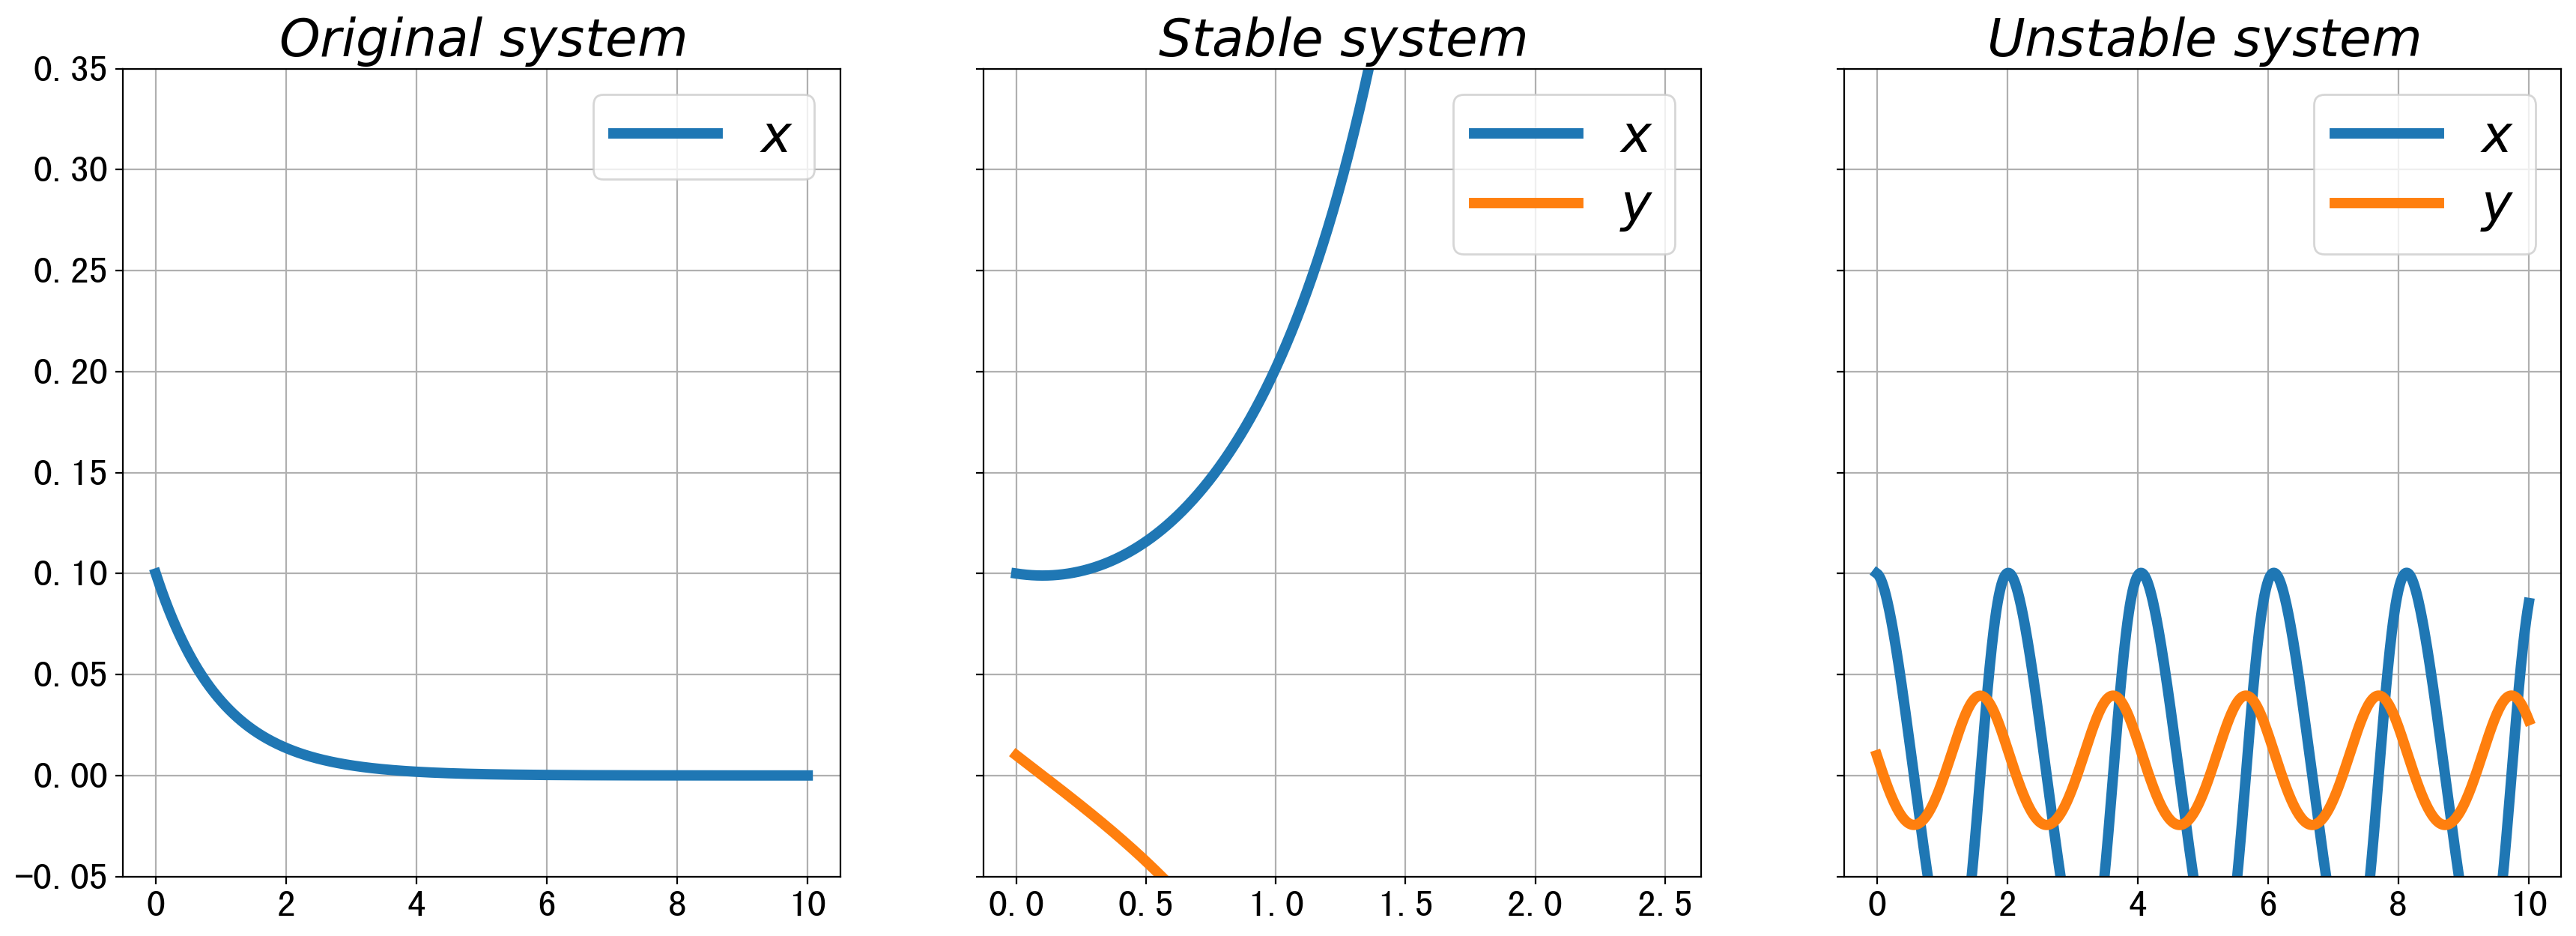

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(21, 7))

ax1.set_title(r"$Original\ system$", size=25)
ax1.plot(t_origin_RK, state_origin_RK[x_origin_index_RK], label=r"$x$", linewidth=5)  # adjust linewidth and use LaTeX in label
ax1.legend(fontsize=25)
ax1.grid()

ax2.set_title(r"$Stable\ system$", size=25)
ax2.plot(t_stable_RK, state_stable_RK[x_stable_index_RK], label=r"$x$", linewidth=5)
ax2.plot(t_stable_RK, state_stable_RK[y_stable_index_RK], label=r"$y$", linewidth=5)
ax2.legend(fontsize=25)
ax2.grid()

ax3.set_title(r"$Unstable\ system$", size=25)
ax3.plot(t_unstable_RK, state_unstable_RK[x_unstable_index_RK], label=r"$x$", linewidth=5)
ax3.plot(t_unstable_RK, state_unstable_RK[y_unstable_index_RK], label=r"$y$", linewidth=5)
ax3.legend(fontsize=25)
ax3.grid()

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.set_ylim(-0.05, 0.35)

plt.savefig("../example2.png", dpi=1000, bbox_inches = 'tight')